# Installing PRAW Package

In [3]:
#!pip install praw

In [4]:
import praw  #Importing PRAW Module

# Setting Up Reddit API Credentials

In [5]:
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036" # Setting up user agent for Reddit API request
# Creating Reddit instance with provided credentials
reddit = praw.Reddit(
    client_id="QWm1pNTk8JgJg4mRf4r6HQ",  # Inserting client ID
    client_secret="mNrJ5qUOl5vI9pIsuPX-dTzB4dDjNA", # Inserting client secret
    user_agent=user_agent
)

# Importing Required Libraries

In [6]:
import pandas as pd  # Importing pandas library as pd for data manipulation
import numpy as np   # Importing numpy library as np for numerical operations
# Importing re module for using regular expressions
import re #RegEx : Regular expression     

# Retrieving Hot New Rising Topics from Reddit's Bitcoin Subreddit

In [7]:
# Hot new rising topics

headlines = set()
# Iterating through submissions in the hot section of the Bitcoin subreddit
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)  #Subreddit Title
    print(submission.id)     #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
16bm9de
BitcoinFan7
1694011779.0
201
0.95
https://www.reddit.com/r/Bitcoin/comments/16bm9de/bitcoin_newcomers_faq_please_read/
0


# Counting Unique Headlines from Reddit's Bitcoin Subreddit

In [8]:
# Counting the Number of Unique Headlines from Reddit's Bitcoin Subreddit
headlines = set()
# Iterating through submissions in the hot section of the Bitcoin subreddit and adding titles to a set to ensure uniqueness
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

784


In [9]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines) # Creating a DataFrame named bitcoin_df from the headlines data
bitcoin_df.head() # Displaying the first few rows of the DataFrame

,0
0,WHAT IS THE BEST WALLET TO HOLD?
1,How many bitcoins does Craig Wright have?
2,BTC in Politics?
3,Random Fact of the day :
4,Question about Bitcoin address


In [10]:
bitcoin_df.columns  # Retrieving DataFrame Columns

RangeIndex(start=0, stop=1, step=1)

In [11]:
bitcoin_df.columns = ['Titles']   # Renaming DataFrame Columns

In [12]:
bitcoin_df.head()  # Displaying DataFrame with Renamed Columns

,Titles
0,WHAT IS THE BEST WALLET TO HOLD?
1,How many bitcoins does Craig Wright have?
2,BTC in Politics?
3,Random Fact of the day :
4,Question about Bitcoin address


In [13]:
bitcoin_df.Titles.duplicated().sum()  # Counting Duplicated Titles in the 'Titles' Column

0

# Cleaning Text Data in DataFrame

In [14]:
#Clean the text

# Function to clean the text by removing mentions, hashtags, retweets, hyperlinks, and colons
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

# Cleaning the text in the 'Titles' column using the cleanTxt function
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

# Displaying the clean text
bitcoin_df.head()

,Titles
0,WHAT IS THE BEST WALLET TO HOLD?
1,How many bitcoins does Craig Wright have?
2,BTC in Politics?
3,Random Fact of the day
4,Question about Bitcoin address


# Removing Emoji and Unicode from Reddit Data

In [15]:
# Function to remove emoji and Unicode characters from text
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Cleaning the text in the 'Titles' column using the remove_emoji function
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

# Displaying the clean text
bitcoin_df.head()

,Titles
0,WHAT IS THE BEST WALLET TO HOLD?
1,How many bitcoins does Craig Wright have?
2,BTC in Politics?
3,Random Fact of the day
4,Question about Bitcoin address


In [16]:
pip install textblob  # Installing TextBlob Package

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install wordcloud  # Installing WordCloud Package

Note: you may need to restart the kernel to use updated packages.


# Importing Required Modules

In [18]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# Calculating Subjectivity and Polarity of Text Data

In [19]:
# Function to get the subjectivity of text using TextBlob
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Function to get the polarity of text using TextBlob
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Adding new columns for subjectivity and polarity to the bitcoin_df DataFrame
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

# Displaying the updated DataFrame
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,WHAT IS THE BEST WALLET TO HOLD?,0.3,1.0
1,How many bitcoins does Craig Wright have?,0.5,0.5
2,BTC in Politics?,0.0,0.0
3,Random Fact of the day,0.5,-0.5
4,Question about Bitcoin address,0.0,0.0


# Grouping the Range of Polarity into Different Categories

In [20]:
# Function to categorize polarity scores into negative, neutral, or positive categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Applying the getInsight function to create a new column 'Insight' in the bitcoin_df DataFrame
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

# Displaying the first 50 rows of the DataFrame
bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,WHAT IS THE BEST WALLET TO HOLD?,0.300000,1.000000,Positive
1,How many bitcoins does Craig Wright have?,0.500000,0.500000,Positive
2,BTC in Politics?,0.000000,0.000000,Neutral
3,Random Fact of the day,0.500000,-0.500000,Negative
4,Question about Bitcoin address,0.000000,0.000000,Neutral
5,UTXO Consolidation Fee/Privacy tradeoff and so...,0.000000,0.000000,Neutral
6,Billions Flow Into Bitcoin ETFs as Banks Colla...,0.000000,0.000000,Neutral
7,When do you begin paying taxes or file if you ...,0.000000,0.000000,Neutral
8,"6 years ago today, the world's first football ...",0.333333,0.250000,Positive
9,Lightning is going to explode merchant and use...,0.000000,0.000000,Neutral


# Importing Required Libraries

In [22]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# Setting the style for matplotlib plots
plt.style.use('fivethirtyeight')

# Plotting Sentiment Scores for Bitcoin

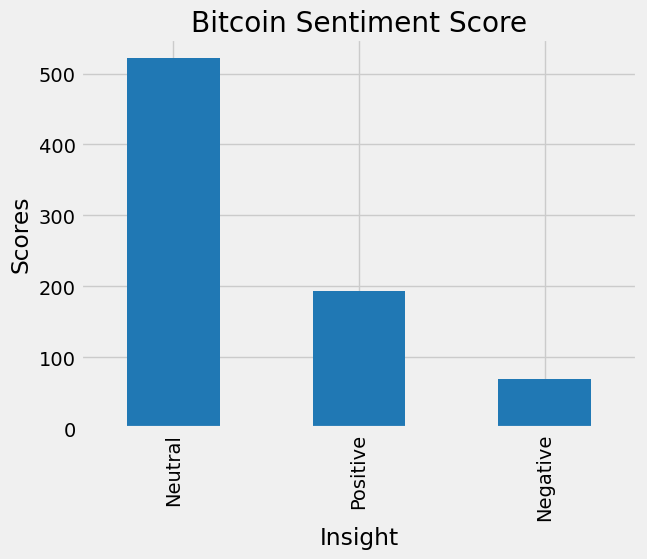

In [23]:
# Plotting the Value Counts of Sentiment
# Setting the title, x-label, and y-label for the plot
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
# Setting the size of the plot
plt.rcParams["figure.figsize"] = (10,8)
# Plotting the value counts of sentiment as a bar plot
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
# Displaying the plot
plt.show()

# Generating Word Cloud from Titles

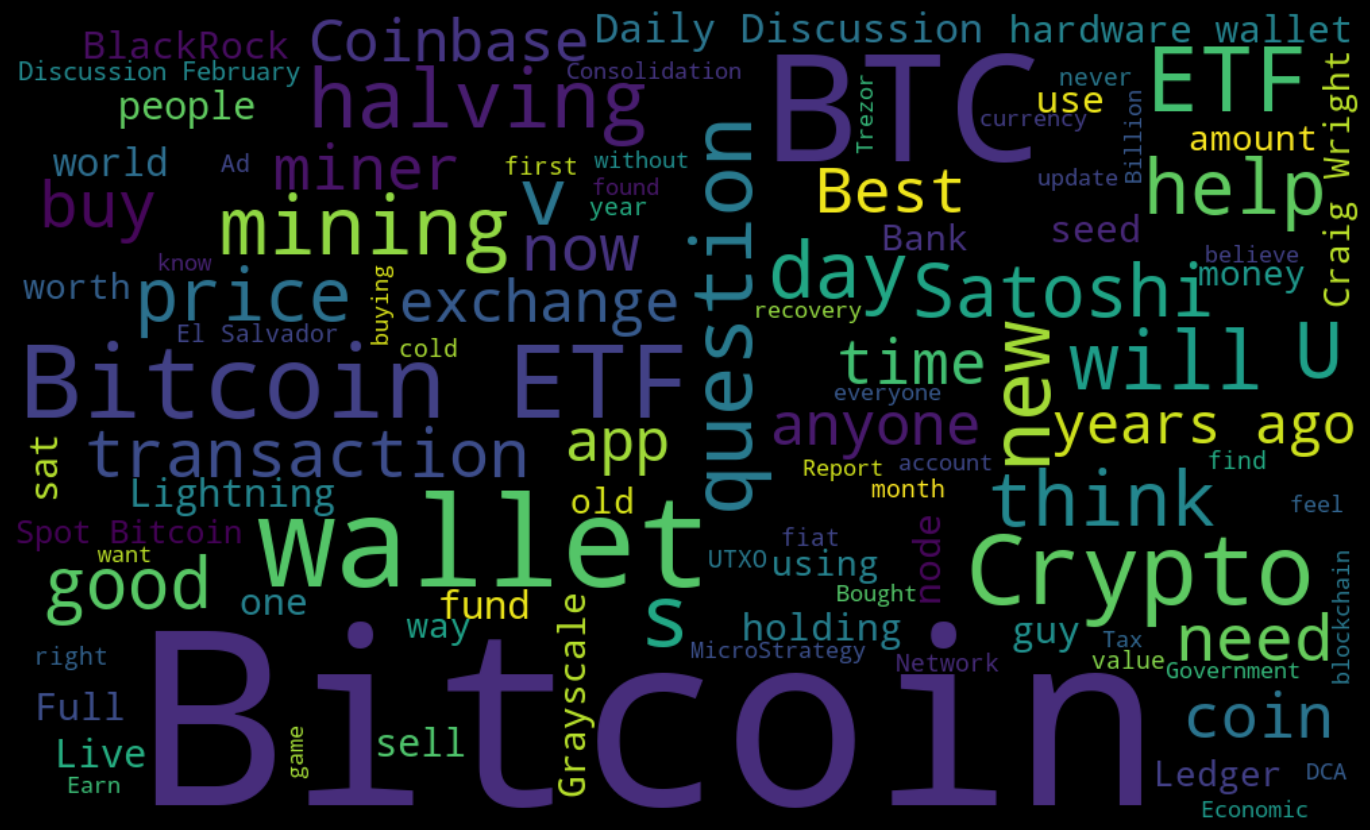

In [24]:
# Joining all titles into a single text
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
# generating word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

# Displaying the generated word cloud image
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");